## Online Demographics Data 

In [1]:
import pandas as pd
import ptitprince as pt
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy.stats import pearsonr

In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

In [3]:
os.chdir("../../")

In [4]:
# Checks current directory
cwd = os.getcwd() 
print("Current working directory is:", cwd) 

Current working directory is: C:\Users\katya\MPI


##### Loading the data  

In [5]:
#Loading the data for session 1

session1 = pd.read_csv('data/session1/clean_dataset.csv')
session1 = session1.set_index('PROLIFICID')

#Loading the data for session 8

session8 = pd.read_csv('data/session8/clean_dataset.csv')
session8 = session8.set_index('PROLIFICID')

#Loading the data for session 15

session15 = pd.read_csv('data/session15/clean_dataset.csv')
session15 = session15.set_index('PROLIFICID')

### Session1  

In [8]:
session1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, 55d06fd334e9060012e5781c to 5eab262cef271f0e2a7e0075
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   submitdate                  400 non-null    object 
 1   lastpage                    402 non-null    int64  
 2   SESSIONID                   402 non-null    float64
 3   GROUP                       402 non-null    object 
 4   sr_age                      400 non-null    float64
 5   sr_gender                   396 non-null    object 
 6   sr_postcode                 402 non-null    object 
 7   q6_me_inf                   397 non-null    float64
 8   q6_close_person_inf         397 non-null    float64
 9   q6_close_person_died        397 non-null    float64
 10  q6_econ_impact_me           402 non-null    float64
 11  q6_econ_impact_closep       402 non-null    float64
 12  q6_work_home                402 non-null    float64
 

##### Overall Distribution

STAI trait anxiety
STAI state anxiety
STICSA trait anxiety
STICSA state anxiety
BDI
Catastophizing


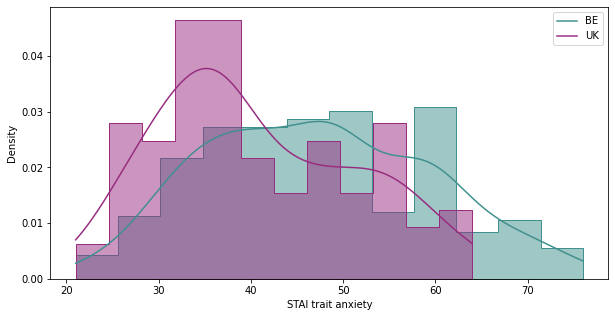

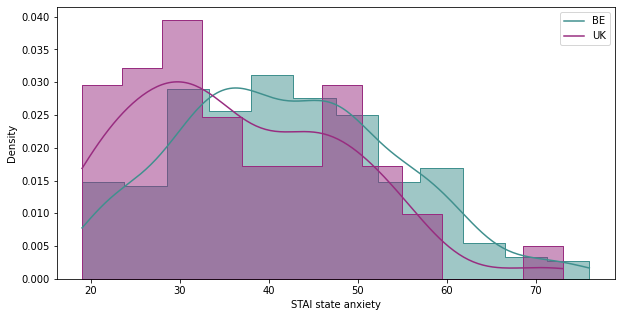

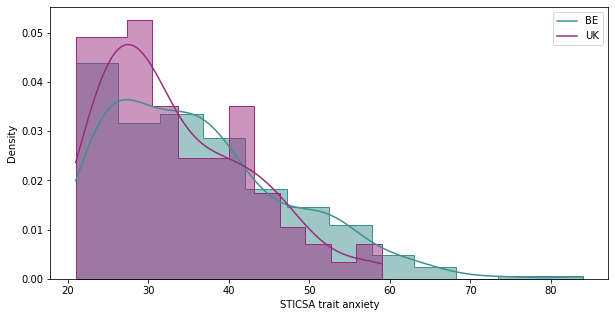

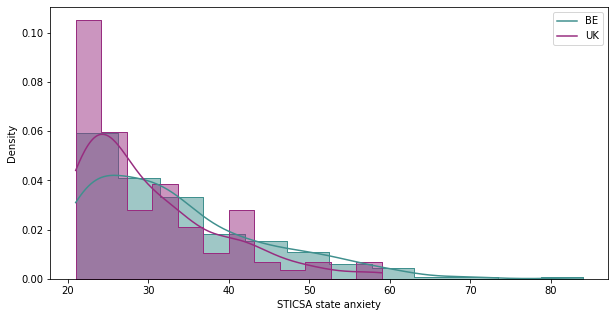

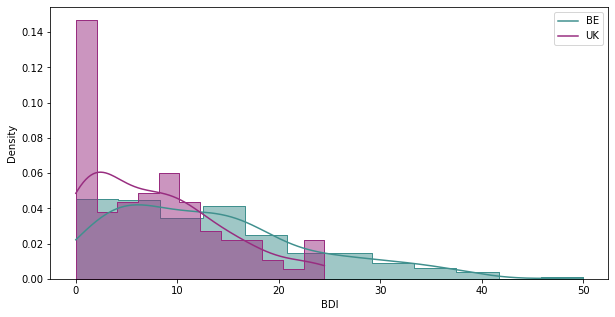

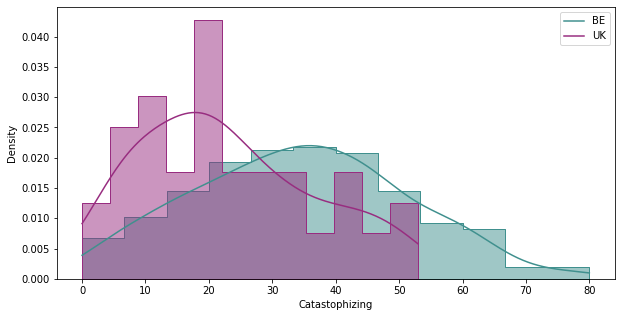

In [9]:
ivs = ["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]; 
#ivs = ['ta_overall']
labels = ['STAI trait anxiety', 'STAI state anxiety', 'STICSA trait anxiety', 'STICSA state anxiety', 'BDI', 'Catastophizing']

for (v,l) in zip(ivs, labels):
    print(l)
    fig, axs = plt.subplots(ncols=1, figsize=(10,5))
    sns.histplot(data=session1[session1['GROUP'] == 'UK'], x=v, bins=12, stat='density', kde=True, element="step",
                color=sns.color_palette("crest")[2])
    sns.histplot(data=session1[session1['GROUP'] == 'BE'], x=v, bins=12, stat='density', kde=True, element="step",
                color=sns.color_palette("magma")[2])
    axs.set_xlabel(l)
    axs.legend(['BE', 'UK'])

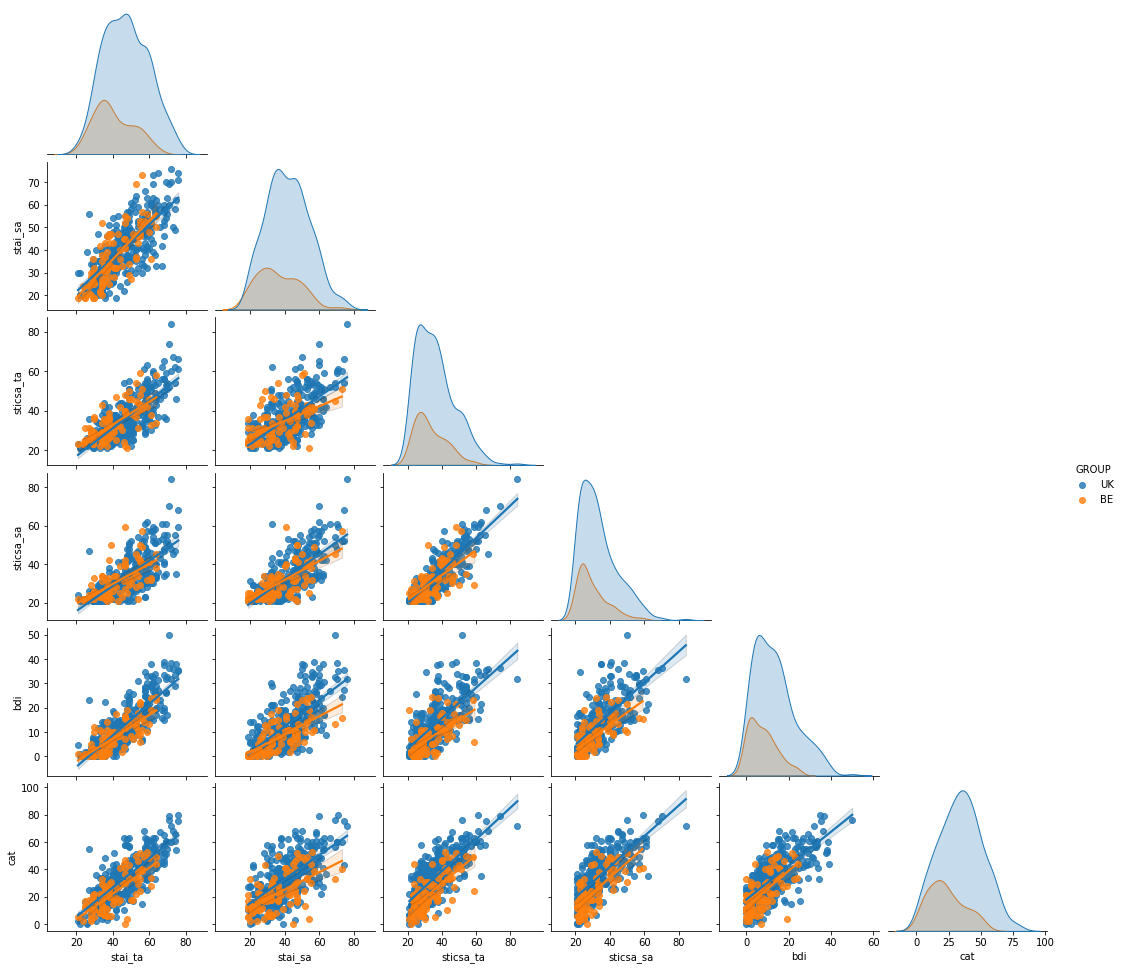

In [10]:
sdf = session1.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat", 'GROUP']]
g = sns.pairplot(sdf, corner=True, diag_kind="kde", kind="reg", hue = 'GROUP')
plt.subplots_adjust(top=0.9)

In [11]:
df = session1.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]]

In [12]:
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

,stai_ta,stai_sa,sticsa_ta,sticsa_sa,bdi,cat
stai_ta,1.0***,0.75***,0.756***,0.722***,0.813***,0.778***
stai_sa,0.75***,1.0***,0.64***,0.719***,0.692***,0.643***
sticsa_ta,0.756***,0.64***,1.0***,0.841***,0.711***,0.752***
sticsa_sa,0.722***,0.719***,0.841***,1.0***,0.716***,0.726***
bdi,0.813***,0.692***,0.711***,0.716***,1.0***,0.723***
cat,0.778***,0.643***,0.752***,0.726***,0.723***,1.0***


<AxesSubplot:>

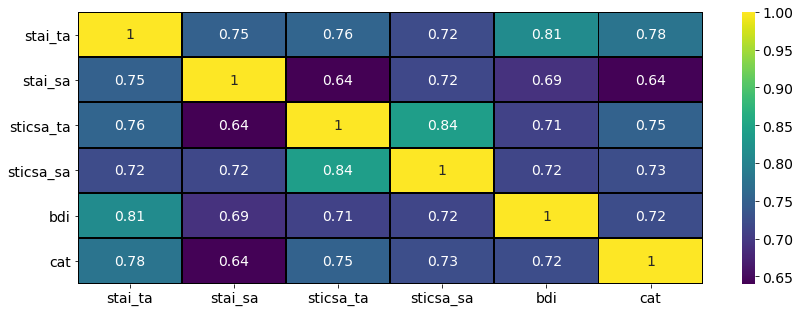

In [13]:
mpl.rcParams['figure.figsize'] = 14,5
mpl.rcParams['font.size'] = 14
sns.heatmap(rho, cmap = 'viridis', linecolor = 'black', linewidth = 1, annot = True)

##### Summary Table

In [26]:
dec = 3 #number of decimal points

header = pd.MultiIndex.from_product([['Male','Female'],
                                     ['M', '%', 'SD']])
summary = pd.DataFrame([['',str(round((session1['sr_gender'][session1['sr_gender'] == 'M'].count() / session1['sr_gender'].count()) * 100,2)) + ' %','','',str(round((session1['sr_gender'][session1['sr_gender'] == 'F'].count() / session1['sr_gender'].count()) * 100,2)) + ' %',''],
                   [round(session1['sr_age'][session1['sr_gender'] == 'M'].mean(),2),'',round(session1['sr_age'][session1['sr_gender'] == 'M'].std(),2),round(session1['sr_age'][session1['sr_gender'] == 'F'].mean(),2),'',round(session1['sr_age'][session1['sr_gender'] == 'F'].std(),2)],
                   [round(session1['stai_ta'][session1['sr_gender'] == 'M'].mean(),2),'',round(session1['stai_ta'][session1['sr_gender'] == 'M'].std(),2),round(session1['stai_ta'][session1['sr_gender'] == 'F'].mean(),2),'',round(session1['stai_ta'][session1['sr_gender'] == 'F'].std(),2)],
                   [round(session1['stai_sa'][session1['sr_gender'] == 'M'].mean(),2),'',round(session1['stai_sa'][session1['sr_gender'] == 'M'].std(),2),round(session1['stai_sa'][session1['sr_gender'] == 'F'].mean(),2),'',round(session1['stai_sa'][session1['sr_gender'] == 'F'].std(),2)],
                   [round(session1['sticsa_ta'][session1['sr_gender'] == 'M'].mean(),2),'',round(session1['sticsa_ta'][session1['sr_gender'] == 'M'].std(),2),round(session1['sticsa_ta'][session1['sr_gender'] == 'F'].mean(),2),'',round(session1['sticsa_ta'][session1['sr_gender'] == 'F'].std(),2)],
                   [round(session1['sticsa_sa'][session1['sr_gender'] == 'M'].mean(),2),'',round(session1['sticsa_sa'][session1['sr_gender'] == 'M'].std(),2),round(session1['sticsa_sa'][session1['sr_gender'] == 'F'].mean(),2),'',round(session1['sticsa_sa'][session1['sr_gender'] == 'F'].std(),2)],
                   [round(session1['bdi'][session1['sr_gender'] == 'M'].mean(),2),'',round(session1['bdi'][session1['sr_gender'] == 'M'].std(),2),round(session1['bdi'][session1['sr_gender'] == 'F'].mean(),2),'',round(session1['bdi'][session1['sr_gender'] == 'F'].std(),2)],
                   [round(session1['cat'][session1['sr_gender'] == 'M'].mean(),2),'',round(session1['cat'][session1['sr_gender'] == 'M'].std(),2),round(session1['cat'][session1['sr_gender'] == 'F'].mean(),2),'',round(session1['cat'][session1['sr_gender'] == 'F'].std(),2)]], 
                  index=['Gender', 'Age', 'Trait Anxiety (STAIT)', 'State Anxiety (STAIS)', 'Trait Cognitive and Somatic Anxiety (STICSAT)', 'State Cognitive and Somatic Anxiety (STICSAS)', 'Beck Depression Inventory (BDI)', 'Catastrophizing'], 
                  columns=header)
header1 = pd.MultiIndex.from_product([[''],
                                     ['P']])
df1 = pd.DataFrame([[''],
                    [round(stats.ttest_ind(session1['sr_age'][session1['sr_gender'] == 'F'], session1['sr_age'][session1['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session1['stai_ta'][session1['sr_gender'] == 'F'], session1['stai_ta'][session1['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session1['stai_sa'][session1['sr_gender'] == 'F'], session1['stai_sa'][session1['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session1['sticsa_ta'][session1['sr_gender'] == 'F'], session1['sticsa_ta'][session1['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session1['sticsa_sa'][session1['sr_gender'] == 'F'], session1['sticsa_sa'][session1['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session1['bdi'][session1['sr_gender'] == 'F'], session1['bdi'][session1['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session1['cat'][session1['sr_gender'] == 'F'], session1['cat'][session1['sr_gender'] == 'M'], nan_policy='omit')[1], dec)]],
                   index=['Gender', 'Age', 'Trait Anxiety (STAIT)', 'State Anxiety (STAIS)', 'Trait Cognitive and Somatic Anxiety (STICSAT)', 'State Cognitive and Somatic Anxiety (STICSAS)', 'Beck Depression Inventory (BDI)', 'Catastrophizing'], columns=header1)

session1_online_demographics = summary.join(df1)

session1_online_demographics.to_excel('output/session1_online_demographics.xlsx')

In [27]:
session1_online_demographics

Male                 Female  \
                                                   M        %     SD      M   
Gender                                                38.64 %                 
Age                                            28.11            5.98  27.30   
Trait Anxiety (STAIT)                          43.84           12.61  46.84   
State Anxiety (STAIS)                          37.58           12.05  42.55   
Trait Cognitive and Somatic Anxiety (STICSAT)  33.11           10.23  37.15   
State Cognitive and Somatic Anxiety (STICSAS)  31.07           10.10  33.69   
Beck Depression Inventory (BDI)                10.85            9.62  12.81   
Catastrophizing                                28.46           16.77  33.85   

                                                                      
                                                     %     SD      P  
Gender                                         61.36 %                
Age                                                      5.79  0.183  
Trait Anxiety (STAIT)                                   11.73  0.016  
State Anxiety (STAIS)                                   12.34  0.000  
Trait Cognitive and Somatic Anxiety (STICSAT)           10.99  0.000  
State Cognitive and Somatic Anxiety (STICSAS)           10.71  0.016  
Beck Depression Inventory (BDI)                          9.22  0.044  
Catastrophizing                                         16.73  0.002

### Session8

In [70]:
session8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 5cae6a77b38ea60016e54889 to 5cf122496b3f1e0017aaebc5
Data columns (total 99 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   submitdate                          329 non-null    object 
 1   lastpage                            330 non-null    int64  
 2   SESSIONID                           330 non-null    int64  
 3   GROUP                               330 non-null    object 
 4   sr_age                              329 non-null    float64
 5   sr_gender                           324 non-null    object 
 6   sr_postcode                         330 non-null    object 
 7   q6_me_inf                           330 non-null    float64
 8   q6_close_person_inf                 330 non-null    float64
 9   q6_close_person_died                330 non-null    float64
 10  q6_diagnosis_type                   31 non-null     object 
 11  q6_eco

##### Overall Distribution

STAI trait anxiety
STAI state anxiety
STICSA trait anxiety
STICSA state anxiety
BDI
Catastophizing


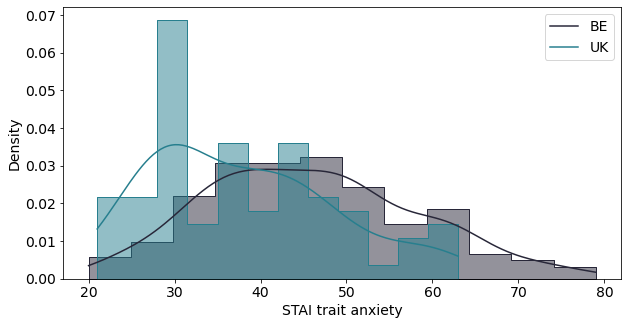

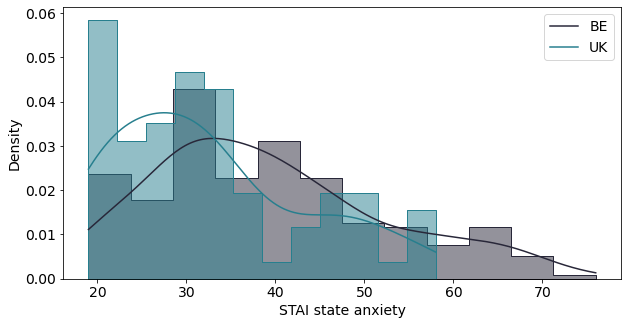

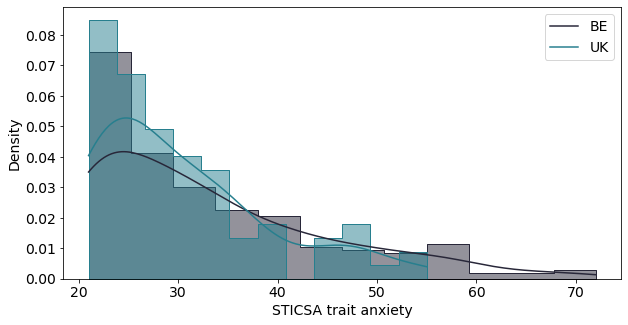

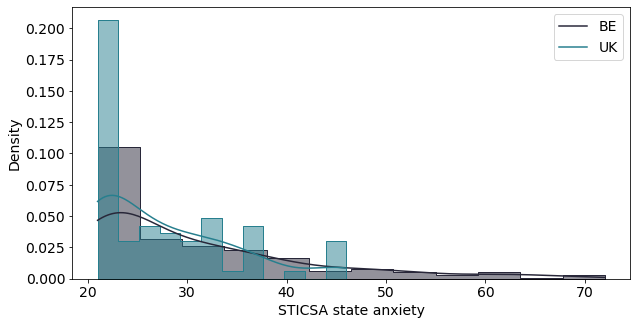

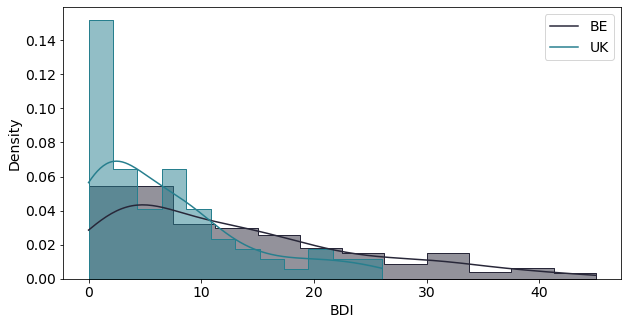

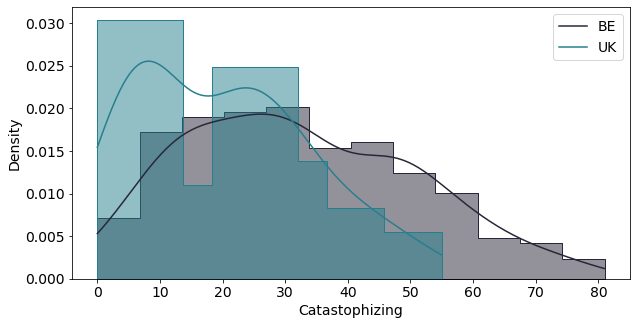

In [71]:
ivs = ["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]; 
#ivs = ['ta_overall']
labels = ['STAI trait anxiety', 'STAI state anxiety', 'STICSA trait anxiety', 'STICSA state anxiety', 'BDI', 'Catastophizing']

for (v,l) in zip(ivs, labels):
    print(l)
    fig, axs = plt.subplots(ncols=1, figsize=(10,5))
    sns.histplot(data=session8[session8['GROUP'] == 'UK'], x=v, bins=12, stat='density', kde=True, element="step",
                color=sns.color_palette("icefire")[2])
    sns.histplot(data=session8[session8['GROUP'] == 'BE'], x=v, bins=12, stat='density', kde=True, element="step",
                color=sns.color_palette("viridis")[2])
    axs.set_xlabel(l)
    axs.legend(['BE', 'UK'])

##### Cross correlations and distributions

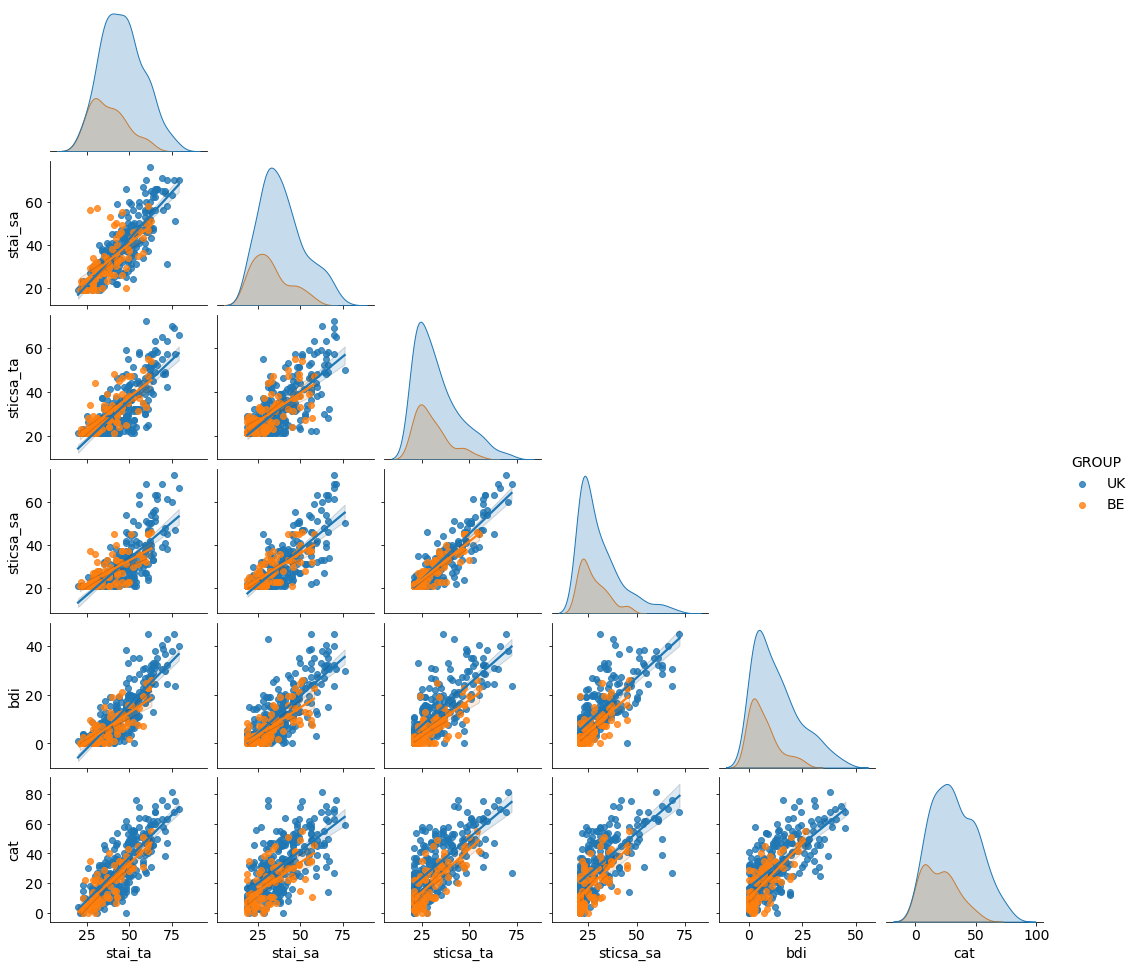

In [72]:
sdf = session8.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat", 'GROUP']]
g = sns.pairplot(sdf, corner=True, diag_kind="kde", kind="reg", hue = 'GROUP')
plt.subplots_adjust(top=0.9)

In [74]:
df = session8.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]]

In [75]:
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

,stai_ta,stai_sa,sticsa_ta,sticsa_sa,bdi,cat
stai_ta,1.0***,0.799***,0.757***,0.725***,0.822***,0.797***
stai_sa,0.799***,1.0***,0.7***,0.76***,0.756***,0.642***
sticsa_ta,0.757***,0.7***,1.0***,0.893***,0.751***,0.696***
sticsa_sa,0.725***,0.76***,0.893***,1.0***,0.764***,0.685***
bdi,0.822***,0.756***,0.751***,0.764***,1.0***,0.709***
cat,0.797***,0.642***,0.696***,0.685***,0.709***,1.0***


<AxesSubplot:>

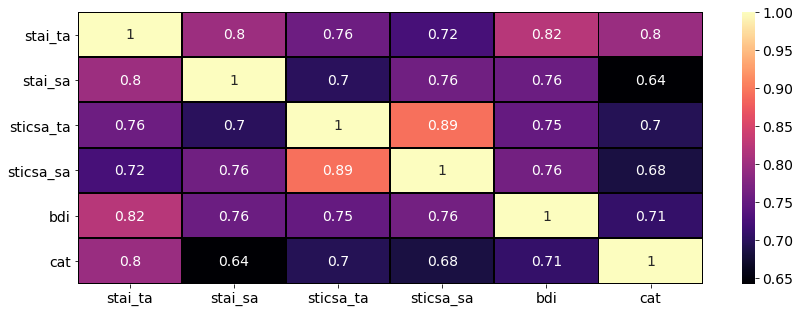

In [76]:
mpl.rcParams['figure.figsize'] = 14,5
mpl.rcParams['font.size'] = 14
sns.heatmap(rho, cmap = 'magma', linecolor = 'black', linewidth = 1, annot = True)

##### Summary Table

In [77]:
header = pd.MultiIndex.from_product([['Male','Female'],
                                     ['M', '%', 'SD']])
summary = pd.DataFrame([['',str(round((session8['sr_gender'][session8['sr_gender'] == 'M'].count() / session8['sr_gender'].count()) * 100,2)) + ' %','','',str(round((session8['sr_gender'][session8['sr_gender'] == 'F'].count() / session8['sr_gender'].count()) * 100,2)) + ' %',''],
                   [round(session8['sr_age'][session8['sr_gender'] == 'M'].mean(),2),'',round(session8['sr_age'][session8['sr_gender'] == 'M'].std(),2),round(session8['sr_age'][session8['sr_gender'] == 'F'].mean(),2),'',round(session8['sr_age'][session8['sr_gender'] == 'F'].std(),2)],
                   [round(session8['stai_ta'][session8['sr_gender'] == 'M'].mean(),2),'',round(session8['stai_ta'][session8['sr_gender'] == 'M'].std(),2),round(session8['stai_ta'][session8['sr_gender'] == 'F'].mean(),2),'',round(session8['stai_ta'][session8['sr_gender'] == 'F'].std(),2)],
                   [round(session8['stai_sa'][session8['sr_gender'] == 'M'].mean(),2),'',round(session8['stai_sa'][session8['sr_gender'] == 'M'].std(),2),round(session8['stai_sa'][session8['sr_gender'] == 'F'].mean(),2),'',round(session8['stai_sa'][session8['sr_gender'] == 'F'].std(),2)],
                   [round(session8['sticsa_ta'][session8['sr_gender'] == 'M'].mean(),2),'',round(session8['sticsa_ta'][session8['sr_gender'] == 'M'].std(),2),round(session8['sticsa_ta'][session8['sr_gender'] == 'F'].mean(),2),'',round(session8['sticsa_ta'][session8['sr_gender'] == 'F'].std(),2)],
                   [round(session8['sticsa_sa'][session8['sr_gender'] == 'M'].mean(),2),'',round(session8['sticsa_sa'][session8['sr_gender'] == 'M'].std(),2),round(session8['sticsa_sa'][session8['sr_gender'] == 'F'].mean(),2),'',round(session8['sticsa_sa'][session8['sr_gender'] == 'F'].std(),2)],
                   [round(session8['bdi'][session8['sr_gender'] == 'M'].mean(),2),'',round(session8['bdi'][session8['sr_gender'] == 'M'].std(),2),round(session8['bdi'][session8['sr_gender'] == 'F'].mean(),2),'',round(session8['bdi'][session8['sr_gender'] == 'F'].std(),2)],
                   [round(session8['cat'][session8['sr_gender'] == 'M'].mean(),2),'',round(session8['cat'][session8['sr_gender'] == 'M'].std(),2),round(session8['cat'][session8['sr_gender'] == 'F'].mean(),2),'',round(session8['cat'][session8['sr_gender'] == 'F'].std(),2)]], 
                  index=['Gender', 'Age', 'Trait Anxiety (STAIT)', 'State Anxiety (STAIS)', 'Trait Cognitive and Somatic Anxiety (STICSAT)', 'State Cognitive and Somatic Anxiety (STICSAS)', 'Beck Depression Inventory (BDI)', 'Catastrophizing'], 
                  columns=header)
header1 = pd.MultiIndex.from_product([[''],
                                     ['P']])
df1 = pd.DataFrame([[''],
                    [round(stats.ttest_ind(session8['sr_age'][session8['sr_gender'] == 'F'], session8['sr_age'][session8['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session8['stai_ta'][session8['sr_gender'] == 'F'], session8['stai_ta'][session8['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session8['stai_sa'][session8['sr_gender'] == 'F'], session8['stai_sa'][session8['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session8['sticsa_ta'][session8['sr_gender'] == 'F'], session8['sticsa_ta'][session8['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session8['sticsa_sa'][session8['sr_gender'] == 'F'], session8['sticsa_sa'][session8['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session8['bdi'][session8['sr_gender'] == 'F'], session8['bdi'][session8['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session8['cat'][session8['sr_gender'] == 'F'], session8['cat'][session8['sr_gender'] == 'M'], nan_policy='omit')[1], dec)]],
                   index=['Gender', 'Age', 'Trait Anxiety (STAIT)', 'State Anxiety (STAIS)', 'Trait Cognitive and Somatic Anxiety (STICSAT)', 'State Cognitive and Somatic Anxiety (STICSAS)', 'Beck Depression Inventory (BDI)', 'Catastrophizing'], columns=header1)

session8_online_demographics = summary.join(df1)

session8_online_demographics.to_excel('output/session8_online_demographics.xlsx')

In [78]:
session8_online_demographics

Male                 Female  \
                                                   M        %     SD      M   
Gender                                                37.65 %                 
Age                                            28.91            5.74  28.12   
Trait Anxiety (STAIT)                          41.56           12.01  45.41   
State Anxiety (STAIS)                          35.74           12.45  38.77   
Trait Cognitive and Somatic Anxiety (STICSAT)  30.20           10.44  33.71   
State Cognitive and Somatic Anxiety (STICSAS)  28.58           10.09  30.93   
Beck Depression Inventory (BDI)                10.29           10.19  12.10   
Catastrophizing                                25.98           17.33  31.44   

                                                                      
                                                     %     SD      P  
Gender                                         62.35 %                
Age                                                      5.91  0.239  
Trait Anxiety (STAIT)                                   12.44  0.007  
State Anxiety (STAIS)                                   13.01  0.040  
Trait Cognitive and Somatic Anxiety (STICSAT)           11.35  0.006  
State Cognitive and Somatic Anxiety (STICSAS)           10.56  0.050  
Beck Depression Inventory (BDI)                         10.35  0.127  
Catastrophizing                                         18.35  0.009

### Session15

In [79]:
session15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 5e7b9ed640bdc91aca715def to 5ea56ecd5d022354cb1c061e
Columns: 110 entries, submitdate to PID
dtypes: float64(38), int64(54), object(18)
memory usage: 260.2+ KB


##### Overall Distribution

STAI trait anxiety
STAI state anxiety
STICSA trait anxiety
STICSA state anxiety
BDI
Catastophizing


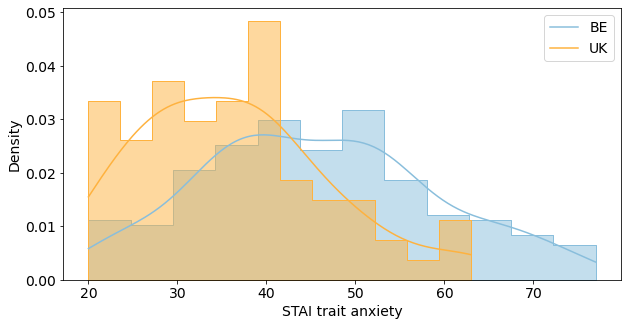

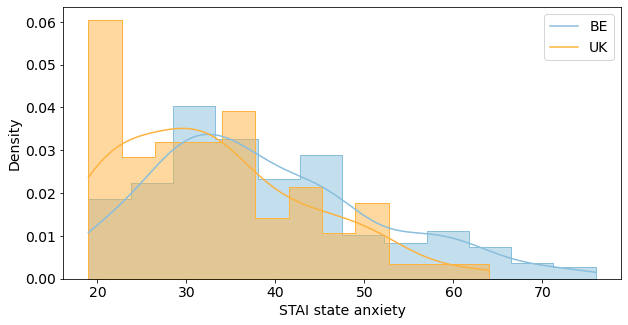

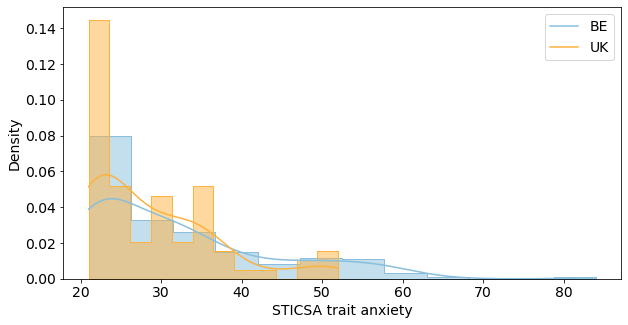

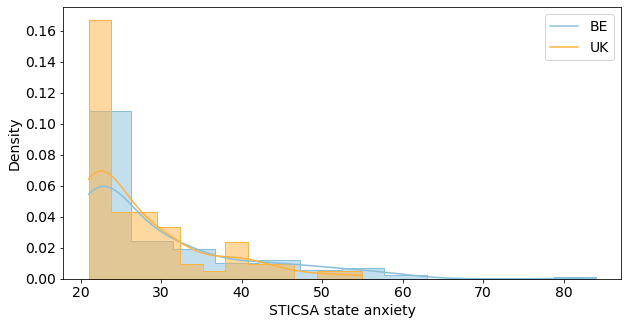

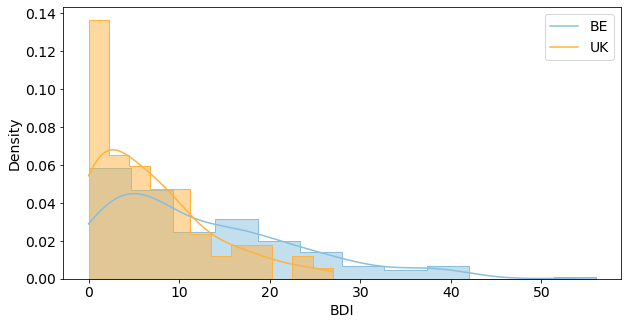

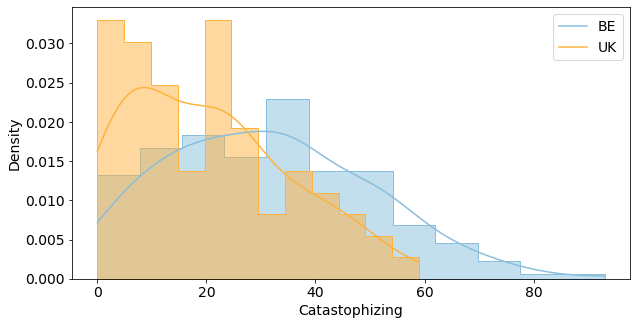

In [80]:
ivs = ["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]; 
#ivs = ['ta_overall']
labels = ['STAI trait anxiety', 'STAI state anxiety', 'STICSA trait anxiety', 'STICSA state anxiety', 'BDI', 'Catastophizing']

for (v,l) in zip(ivs, labels):
    print(l)
    fig, axs = plt.subplots(ncols=1, figsize=(10,5))
    sns.histplot(data=session15[session15['GROUP'] == 'UK'], x=v, bins=12, stat='density', kde=True, element="step",
                color=sns.color_palette("Blues")[2])
    sns.histplot(data=session15[session15['GROUP'] == 'BE'], x=v, bins=12, stat='density', kde=True, element="step",
                color=sns.color_palette("YlOrBr")[2])
    axs.set_xlabel(l)
    axs.legend(['BE', 'UK'])

##### Cross correlations and distributions

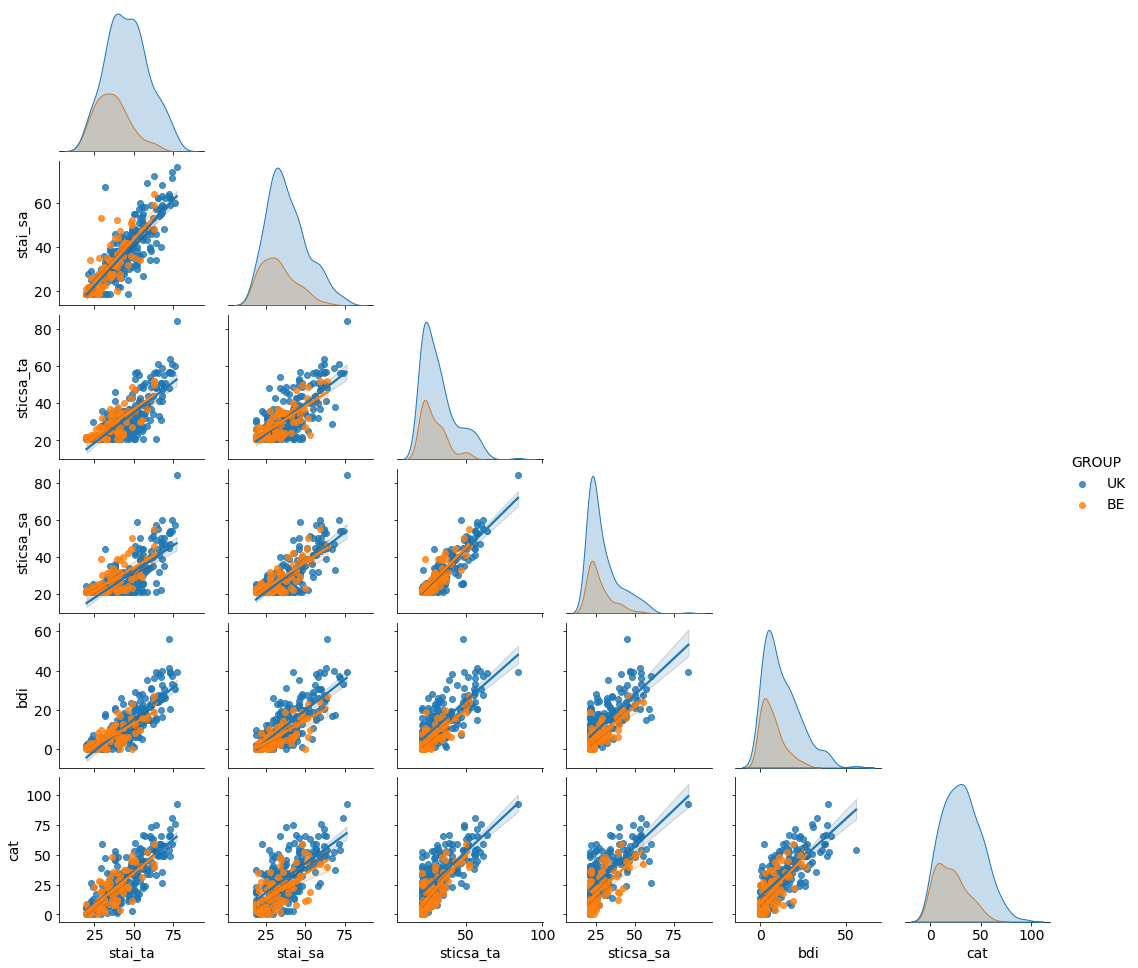

In [81]:
sdf = session15.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat", 'GROUP']]
g = sns.pairplot(sdf, corner=True, diag_kind="kde", kind="reg", hue = 'GROUP')
plt.subplots_adjust(top=0.9)

In [33]:
df = session15.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]]

In [34]:
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

,stai_ta,stai_sa,sticsa_ta,sticsa_sa,bdi,cat
stai_ta,1.0***,0.815***,0.747***,0.693***,0.809***,0.781***
stai_sa,0.815***,1.0***,0.719***,0.771***,0.762***,0.663***
sticsa_ta,0.747***,0.719***,1.0***,0.893***,0.76***,0.747***
sticsa_sa,0.693***,0.771***,0.893***,1.0***,0.748***,0.69***
bdi,0.809***,0.762***,0.76***,0.748***,1.0***,0.736***
cat,0.781***,0.663***,0.747***,0.69***,0.736***,1.0***


<AxesSubplot:>

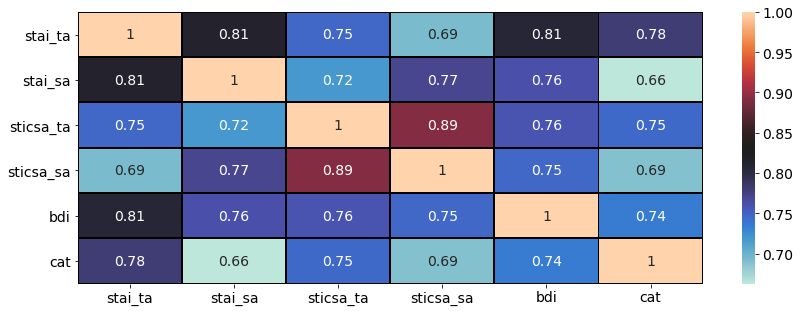

In [35]:
mpl.rcParams['figure.figsize'] = 14,5
mpl.rcParams['font.size'] = 14
sns.heatmap(rho, cmap = 'icefire', linecolor = 'black', linewidth = 1, annot = True)

##### Summary Table

In [36]:
header = pd.MultiIndex.from_product([['Male','Female'],
                                     ['M', '%', 'SD']])
summary = pd.DataFrame([['',str(round((session15['sr_gender'][session15['sr_gender'] == 'M'].count() / session15['sr_gender'].count()) * 100,2)) + ' %','','',str(round((session15['sr_gender'][session15['sr_gender'] == 'F'].count() / session15['sr_gender'].count()) * 100,2)) + ' %',''],
                   [round(session15['sr_age'][session15['sr_gender'] == 'M'].mean(),2),'',round(session15['sr_age'][session15['sr_gender'] == 'M'].std(),2),round(session15['sr_age'][session15['sr_gender'] == 'F'].mean(),2),'',round(session15['sr_age'][session15['sr_gender'] == 'F'].std(),2)],
                   [round(session15['stai_ta'][session15['sr_gender'] == 'M'].mean(),2),'',round(session15['stai_ta'][session15['sr_gender'] == 'M'].std(),2),round(session15['stai_ta'][session15['sr_gender'] == 'F'].mean(),2),'',round(session15['stai_ta'][session15['sr_gender'] == 'F'].std(),2)],
                   [round(session15['stai_sa'][session15['sr_gender'] == 'M'].mean(),2),'',round(session15['stai_sa'][session15['sr_gender'] == 'M'].std(),2),round(session15['stai_sa'][session15['sr_gender'] == 'F'].mean(),2),'',round(session15['stai_sa'][session15['sr_gender'] == 'F'].std(),2)],
                   [round(session15['sticsa_ta'][session15['sr_gender'] == 'M'].mean(),2),'',round(session15['sticsa_ta'][session15['sr_gender'] == 'M'].std(),2),round(session15['sticsa_ta'][session15['sr_gender'] == 'F'].mean(),2),'',round(session15['sticsa_ta'][session15['sr_gender'] == 'F'].std(),2)],
                   [round(session15['sticsa_sa'][session15['sr_gender'] == 'M'].mean(),2),'',round(session15['sticsa_sa'][session15['sr_gender'] == 'M'].std(),2),round(session15['sticsa_sa'][session15['sr_gender'] == 'F'].mean(),2),'',round(session15['sticsa_sa'][session15['sr_gender'] == 'F'].std(),2)],
                   [round(session15['bdi'][session15['sr_gender'] == 'M'].mean(),2),'',round(session15['bdi'][session15['sr_gender'] == 'M'].std(),2),round(session15['bdi'][session15['sr_gender'] == 'F'].mean(),2),'',round(session15['bdi'][session15['sr_gender'] == 'F'].std(),2)],
                   [round(session15['cat'][session15['sr_gender'] == 'M'].mean(),2),'',round(session15['cat'][session15['sr_gender'] == 'M'].std(),2),round(session15['cat'][session15['sr_gender'] == 'F'].mean(),2),'',round(session15['cat'][session15['sr_gender'] == 'F'].std(),2)]], 
                  index=['Gender', 'Age', 'Trait Anxiety (STAIT)', 'State Anxiety (STAIS)', 'Trait Cognitive and Somatic Anxiety (STICSAT)', 'State Cognitive and Somatic Anxiety (STICSAS)', 'Beck Depression Inventory (BDI)', 'Catastrophizing'], 
                  columns=header)
header1 = pd.MultiIndex.from_product([[''],
                                     ['P']])
df1 = pd.DataFrame([[''],
                    [round(stats.ttest_ind(session15['sr_age'][session15['sr_gender'] == 'F'], session15['sr_age'][session15['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session15['stai_ta'][session15['sr_gender'] == 'F'], session15['stai_ta'][session15['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session15['stai_sa'][session15['sr_gender'] == 'F'], session15['stai_sa'][session15['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session15['sticsa_ta'][session15['sr_gender'] == 'F'], session15['sticsa_ta'][session15['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session15['sticsa_sa'][session15['sr_gender'] == 'F'], session15['sticsa_sa'][session15['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session15['bdi'][session15['sr_gender'] == 'F'], session15['bdi'][session15['sr_gender'] == 'M'], nan_policy='omit')[1], dec)],
                    [round(stats.ttest_ind(session15['cat'][session15['sr_gender'] == 'F'], session15['cat'][session15['sr_gender'] == 'M'], nan_policy='omit')[1], dec)]],
                   index=['Gender', 'Age', 'Trait Anxiety (STAIT)', 'State Anxiety (STAIS)', 'Trait Cognitive and Somatic Anxiety (STICSAT)', 'State Cognitive and Somatic Anxiety (STICSAS)', 'Beck Depression Inventory (BDI)', 'Catastrophizing'], columns=header1)

session15_online_demographics = summary.join(df1)

session15_online_demographics.to_excel('output/session15_online_demographics.xlsx')

In [37]:
session15_online_demographics

Male                 Female  \
                                                   M        %     SD      M   
Gender                                                40.55 %                 
Age                                            29.57            5.70  28.84   
Trait Anxiety (STAIT)                          41.17           13.00  44.91   
State Anxiety (STAIS)                          35.14           12.05  38.45   
Trait Cognitive and Somatic Anxiety (STICSAT)  29.45           10.72  32.69   
State Cognitive and Somatic Anxiety (STICSAS)  27.64            9.75  29.88   
Beck Depression Inventory (BDI)                 9.55            9.56  12.12   
Catastrophizing                                23.75           16.98  31.50   

                                                                      
                                                     %     SD      P  
Gender                                         59.45 %                
Age                                                      5.78  0.289  
Trait Anxiety (STAIT)                                   13.30  0.018  
State Anxiety (STAIS)                                   12.51  0.025  
Trait Cognitive and Somatic Anxiety (STICSAT)           10.96  0.013  
State Cognitive and Somatic Anxiety (STICSAS)           10.05  0.061  
Beck Depression Inventory (BDI)                         10.27  0.031  
Catastrophizing                                         18.64  0.000